# 1. Import libraries and load the dataset

In [1]:
import optuna
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#import randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

c:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("diabetes.csv")

# 2. Explore and and visualize data

## 2.1. Explore

### a. Understanding the dataset¶
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

Tập dữ liệu Diabetes của người da đỏ Pima, gốc từ Viện Tim mạch và Thận Tiểu Đường Quốc gia, chứa thông tin của 768 phụ nữ từ một nhóm dân số gần Phoenix, Arizona, Hoa Kỳ. Kết quả được kiểm tra là Bệnh tiểu đường, có 258 trường hợp dương tính và 500 trường hợp âm tính

In [8]:
df.head() #hiển thị 5 bản ghi dữ liệu hàng đầu để làm quen vơi dữ liệu

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Pregnancies: Số lần mang thai.

- Glucose: Nồng độ glucose trong máu sau 2 giờ trong xét nghiệm dung nạp glucose.

- Blood Pressure: Huyết áp tâm trương (mm Hg).

- Skin Thickness: Độ dày của da (mm).

- Insulin: Nồng độ insulin trong máu (mu U/ml).

- BMI: Chỉ số khối cơ thể (Body Mass Index) được tính bằng công thức: cân nặng (kg) / chiều cao (m)^2.

- Diabetes Pedigree Function: Hàm số di truyền của bệnh tiểu đường (một giá trị đánh giá khả năng mắc bệnh tiểu đường dựa trên lịch  sử gia đình).

- Age: Tuổi (năm).

- Outcome: Biến nhãn (0 hoặc 1), với giá trị 1 biểu thị bệnh nhân bị tiểu đường, và giá trị 0 biểu thị bệnh nhân không bị tiểu đường.

- Glucose:

    - Trung bình: 120 mg/dL
    - Người mắc bệnh: Trung bình > 140 mg/dL

- Blood Pressure:

    - Trung bình: 69 mm Hg
    - Người mắc bệnh: > 80 mm Hg

- Skin Thickness:

    - Trung bình: 20 mm
    - Người mắc bệnh: Không có ngưỡng xác định rõ ràng.

- Insulin:

    - Trung bình: 80 µU/mL
     - Người mắc bệnh: > 100 µU/mL (kháng insulin)

- BMI:

    - Trung bình: 32
    - Người mắc bệnh: > 30 (béo phì)

- Diabetes Pedigree Function:

    - Trung bình: 0.47
    - Người mắc bệnh: > 0.5

In [9]:
df.shape # Tìm hiểu về số lượng hàng cột của dữ liệu


(768, 9)

In [10]:
df.columns # Các cột trong tập dữ liệu

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
df.rename(columns = {'DiabetesPedigreeFunction':'DPF'}, inplace = True)
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.dtypes #Các kiểu dữ liệu có trong tập dữ liệu

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

In [13]:
df.info() # Tóm tắt thông tin về dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.describe() #Hiểu dữ liệu đã được trải rộng trên bảng như thế nào.
# count : - số lượng hàng NoN trống trong một đối tượng địa lý.
# mean :- giá trị trung bình của đặc trưng đó.
# std :- Giá trị độ lệch chuẩn của đặc điểm đó.
# min :- giá trị tối thiểu của tính năng đó.
# max :- giá trị tối đa của tính năng đó.
# 25%, 50% và 75% là phần trăm/phần tư của từng đặc điểm.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2.2. Visualize data

### a. Trực quan hóa dữ liệu bằng biểu đồ phân phối
- Biểu đồ phân phối


In [4]:
# Function for Stacked Histograms with Outcome Coloring
def plot_stacked_histograms(data, features, figsize=(20, 5)):

  num_features = len(features)
  num_rows = (num_features + 3) // 3

  plt.figure(figsize=figsize)
  for i, feature in enumerate(features):
    row_num = (i // 3) + 1
    col_num = (i % 3) + 1

    plt.subplot(num_rows, 3, (row_num - 1) * 3 + col_num)
    sns.histplot(data=data, x=feature, hue="Outcome", multiple="stack", kde=True)
    plt.title(f"{feature} by Outcome")

  plt.tight_layout()
  plt.show()

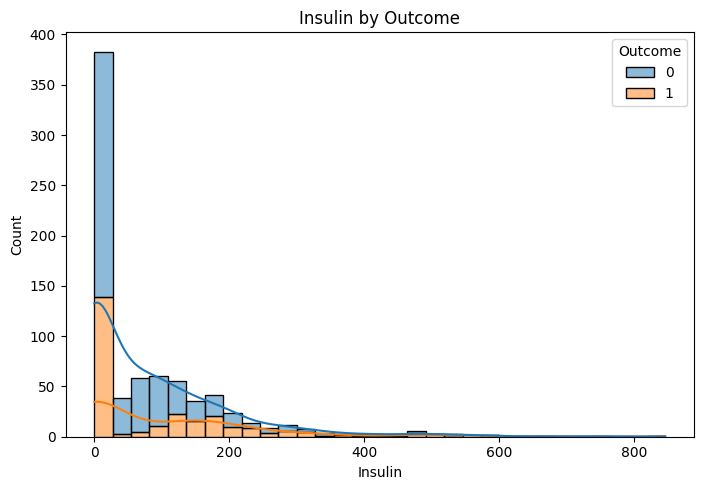

In [5]:
# Calling the function with our data and list of features
features = ['Insulin']
plot_stacked_histograms(df, features)

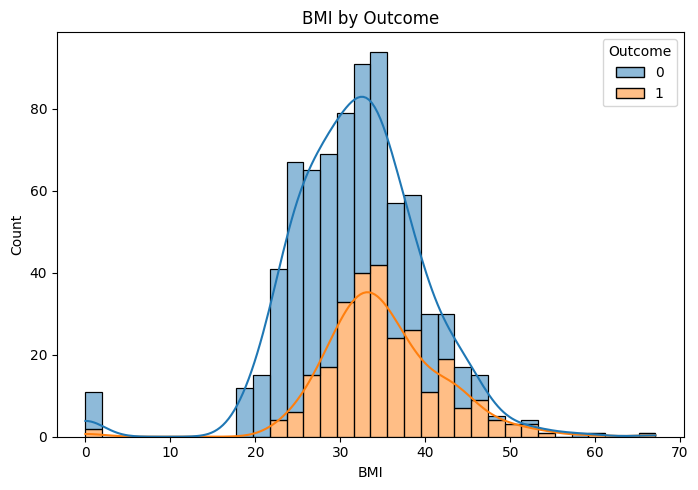

In [6]:
# Calling the function with our data and list of features
features = ['BMI']
plot_stacked_histograms(df, features)

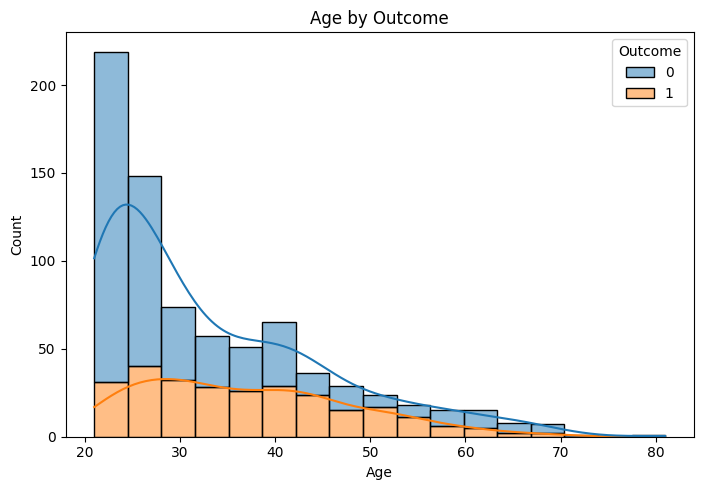

In [7]:
# Calling the function with our data and list of features
features = ['Age']
plot_stacked_histograms(df, features)

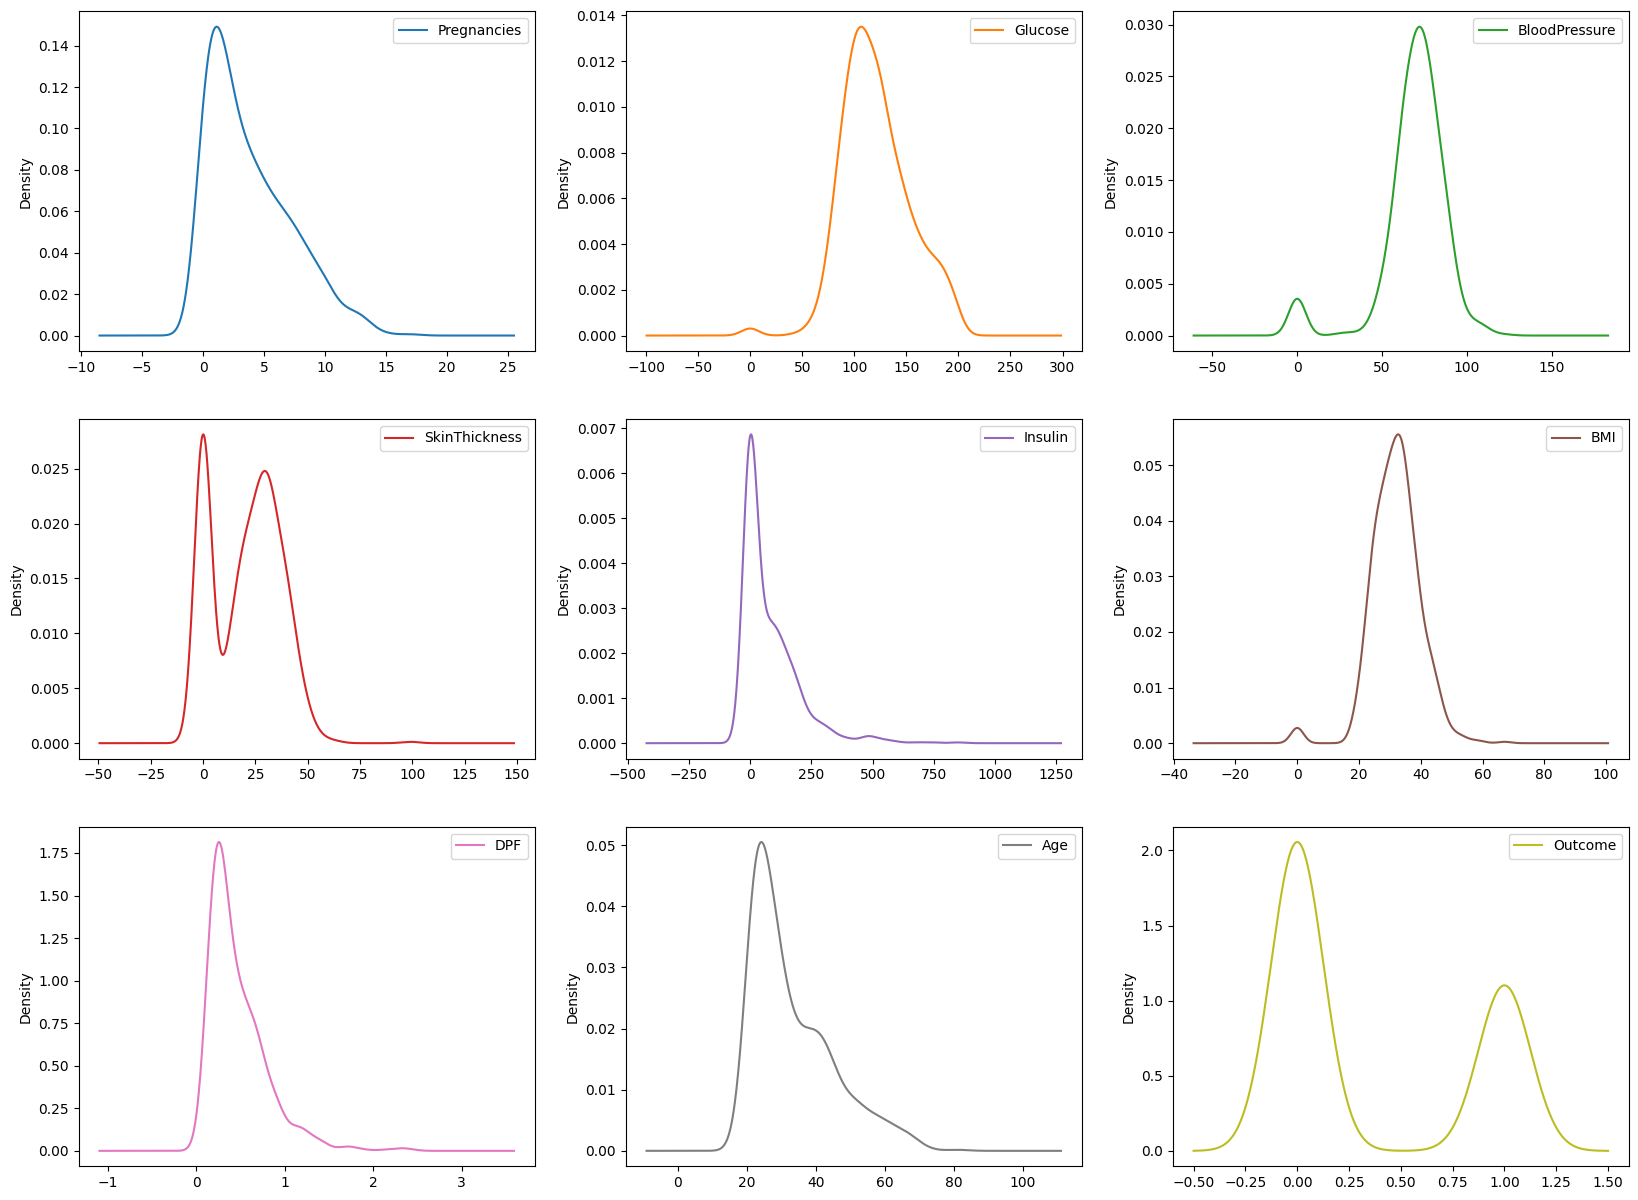

In [9]:
# Density plots for all attributes to visualize the distribution of each attribute
df.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

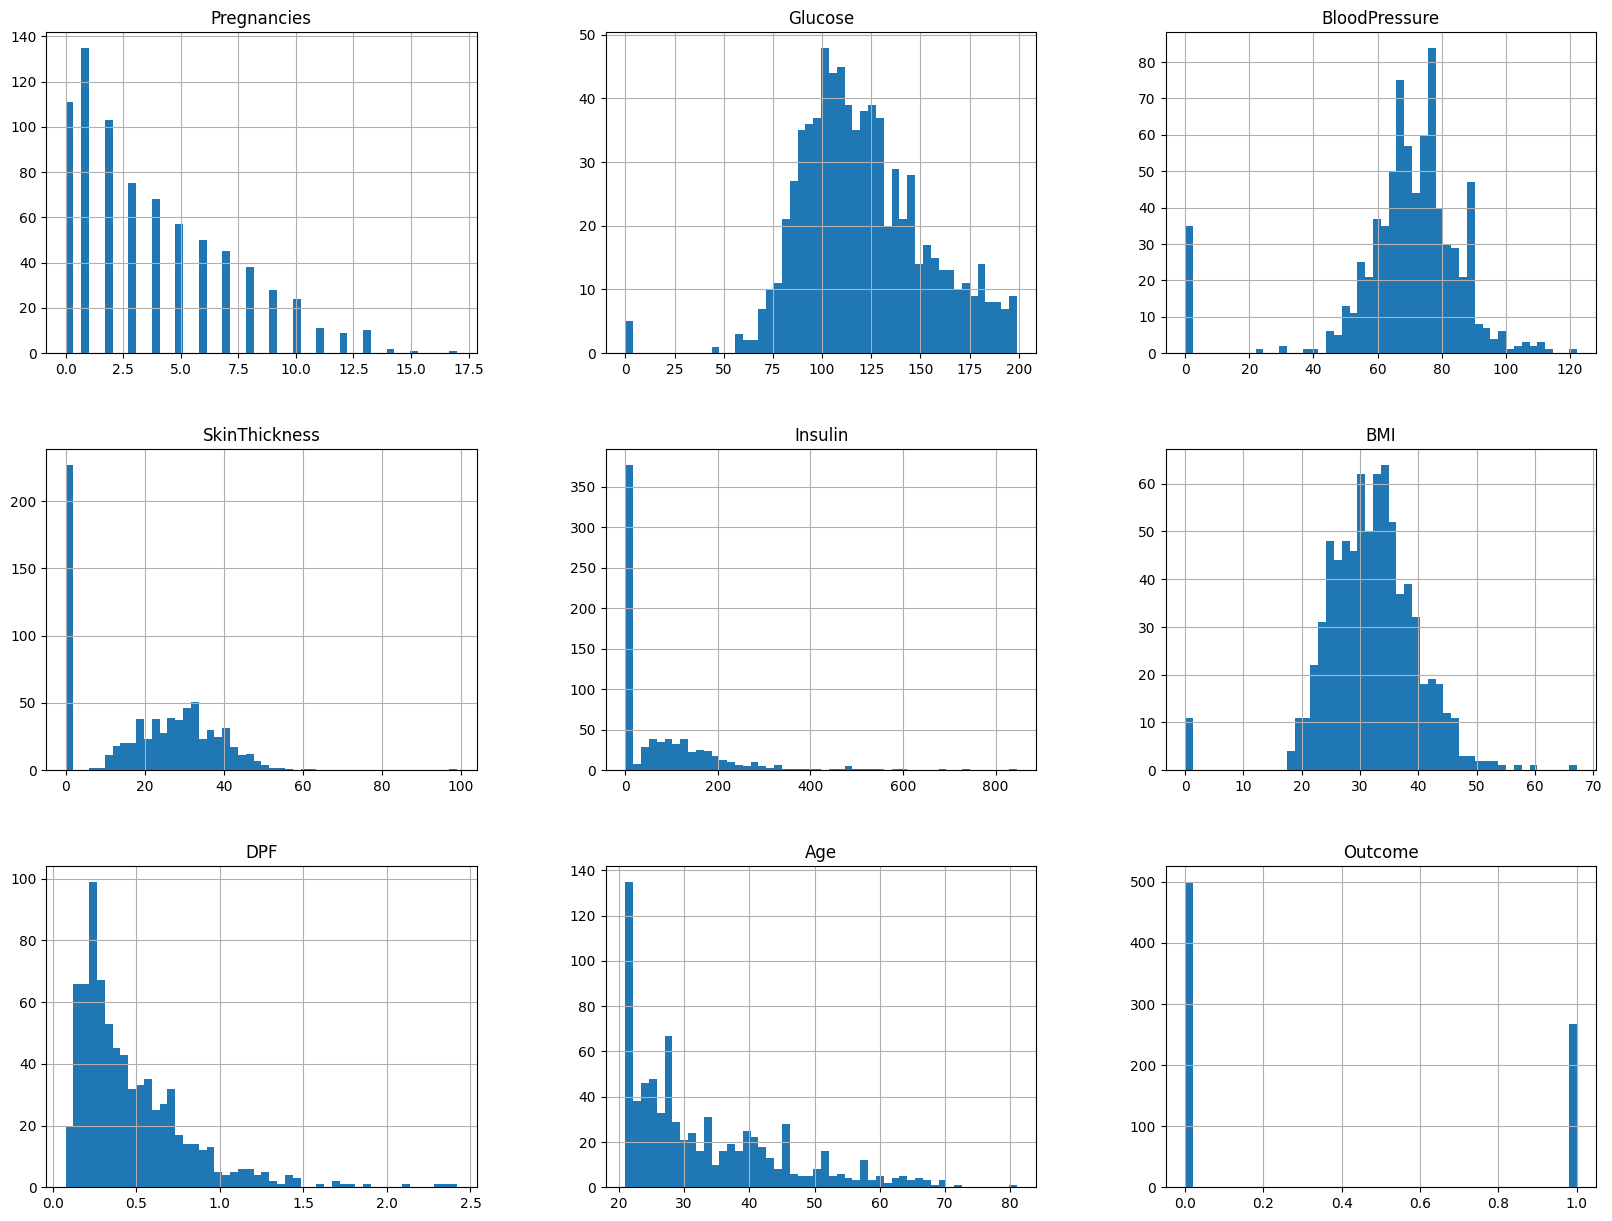

In [10]:
# Histogram
df.hist(bins=50, figsize=(20, 15))
plt.show()

- Từ biểu đồ này, có thể thấy rằng các yếu tố như Huyết áp, Nồng độ glucose và Chỉ số khối cơ thể (BMI) có phân phối chuẩn, trong khi Tuổi, Số lần mang thai và Insulin có phân phối mũ. Ngoài ra, trong biểu đồ phân phối Outcome, có thể thấy sự không cân bằng đầu ra trong bộ dữ liệu.

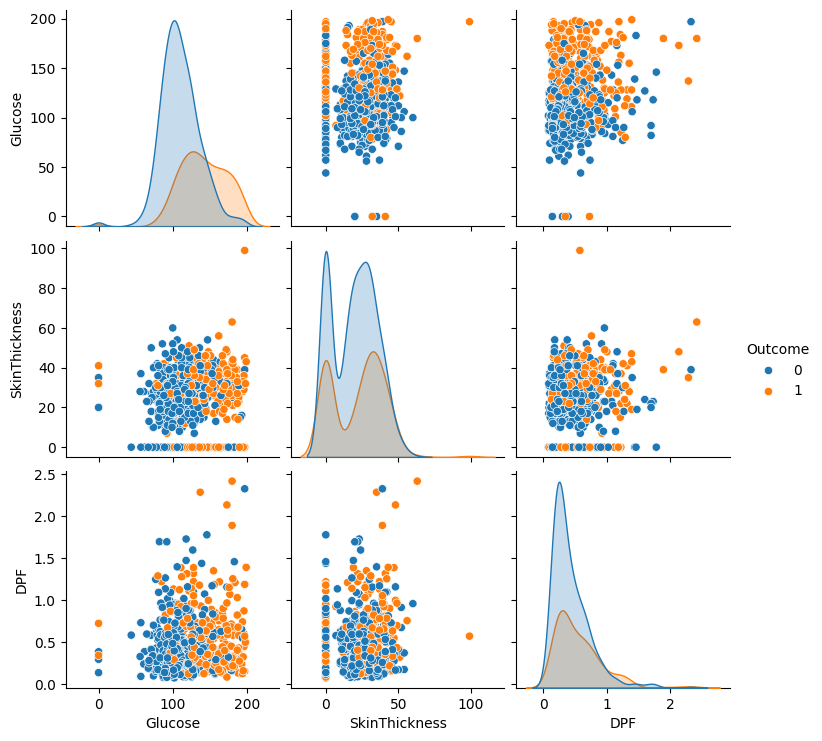

In [12]:
sns.pairplot(data = df, vars = ['Glucose', 'SkinThickness', 'DPF'], hue = 'Outcome')
plt.show()

- Biểu đồ phân tán giữa Glucose và Insulin

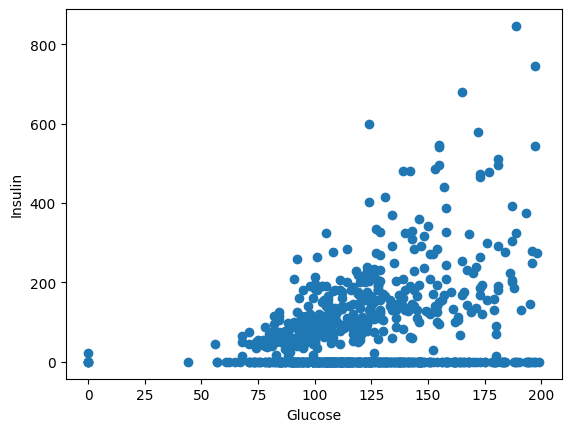

In [13]:
plt.scatter(x = 'Glucose', y = 'Insulin', data = df)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

- Nhìn chung, khi mức đường huyết tăng thì mức insulin cũng tăng theo. Tuy nhiên, đối với phần lớn phụ nữ có mức đường huyết dưới 140, mức insulin của họ vẫn duy trì dưới 400.

### b. Trực quan hóa mối quan hệ giữa các đặc trưng và nhãn

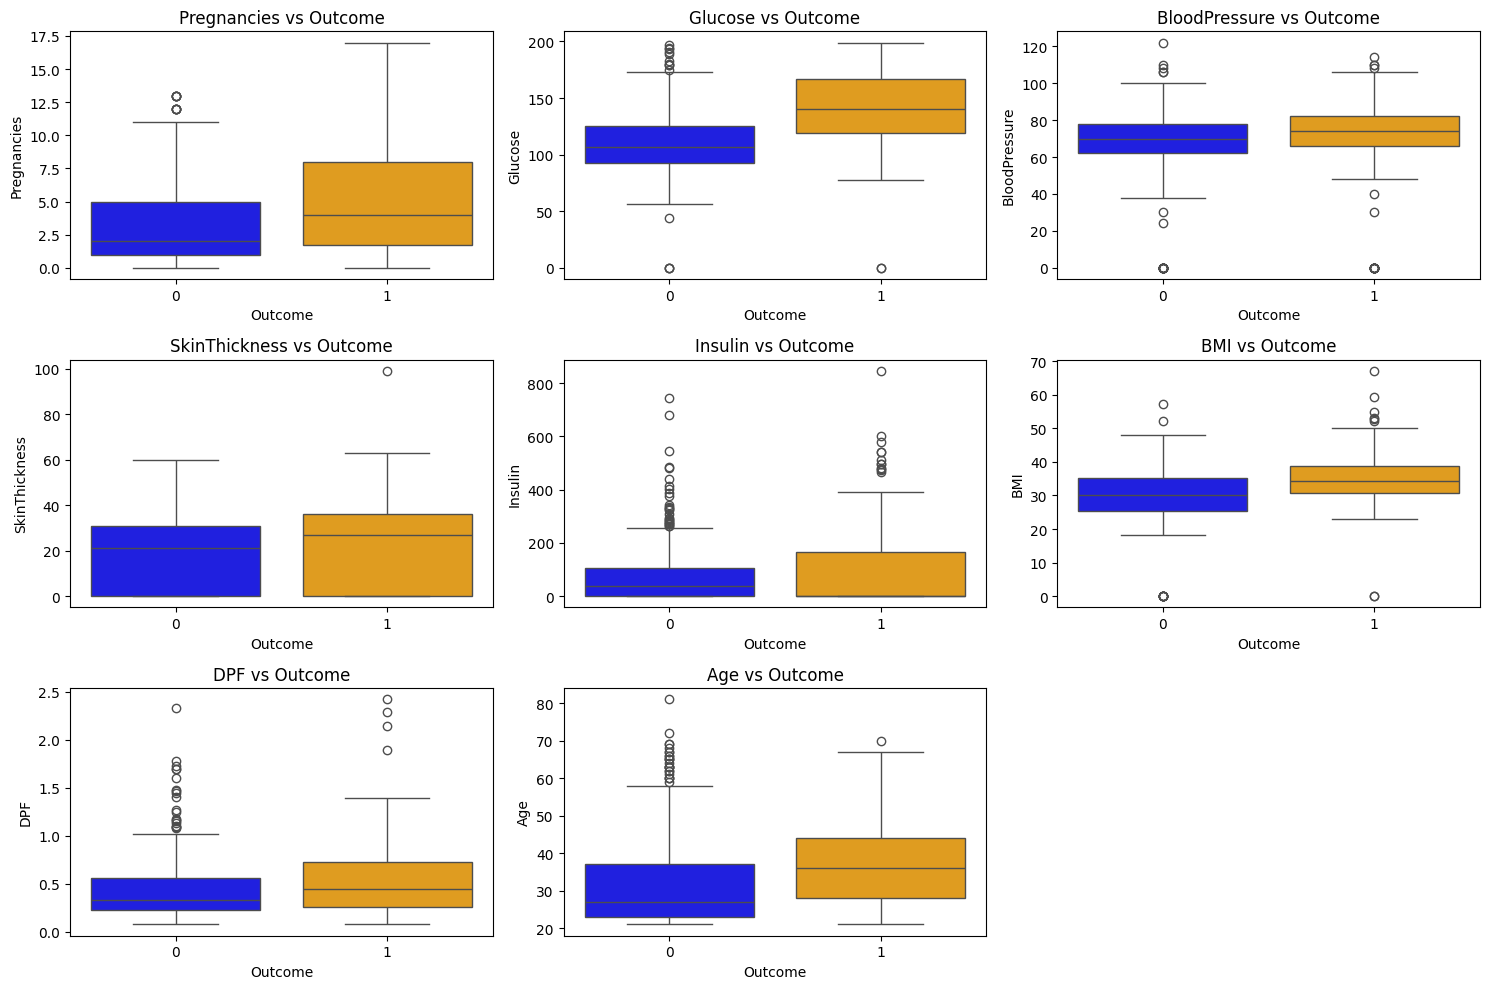

In [14]:
# Trực quan hóa mối quan hệ giữa các đặc trưng và nhãn
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=column, data=df, palette=['blue', 'orange'])
    plt.title(f'{column} vs Outcome')
plt.tight_layout()
plt.show()

Nhìn vào biểu đồ boxplot trực quan hóa mối quan hệ giữa các đặc trưng và nhãn, có thể nhận thấy một số đặc trưng có sự chênh lệch rõ ảnh hưởng đến việc phân loại bệnh tiểu đường như: Nồng độ glucose, Age (tuổi), Pregnancies (số lần mang thai).
-	Nồng độ glucose: có thể thấy bệnh nhân mắc bệnh tiểu đường thường có nồng độ glucose khoảng từ 120 đến 170, trong khi các bệnh nhân không mắc bệnh thường có nồng độ glucose dưới mức 120.
-	Age (tuổi): Bệnh nhân mắc bệnh tiểu đường có nhiều khả năng ở độ tuổi từ đầu 20 đến đầu 40.
-	Pregnancies (số lần mang thai): Số lần mang thai cũng ảnh hưởng đến khả năng mắc bệnh tiểu đường. Thông qua biểu đồ boxplot có thể thấy nhiều phụ nữ mắc bệnh tiểu đường thường sinh từ 2 đến 8 đứa con, đặc biệt tập trung nhiều trong khoảng sinh từ 2 đến 4 đứa con.


### b. Trực quan hóa mối quan hệ giữa các đặc trưng
- Biểu đồ heatmap

In [15]:
# Correlation between the different characteristics. Closer to 1 better is the correlation.

corr_matrix_pearson = df.corr(method='pearson')
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

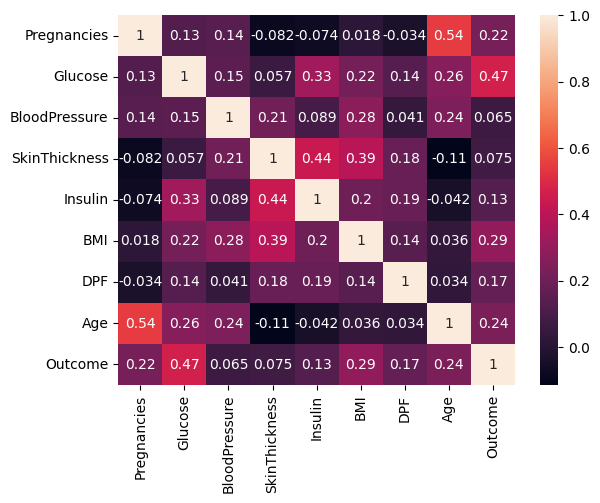

In [16]:
sns.heatmap(corr_matrix_pearson, annot = True)

- Thông qua biểu đồ nhiệt (heatmap) có thể thấy có 3 đặc trưng có ảnh hưởng lớn đến kết quả phân loại đó là Glucose, BMI, Số lần mang thai và Age (tuổi) với lần lượt tần suất là tần suất là 0.47, 0.29, 0.22 và 0.24.

- Biểu đồ pairplot

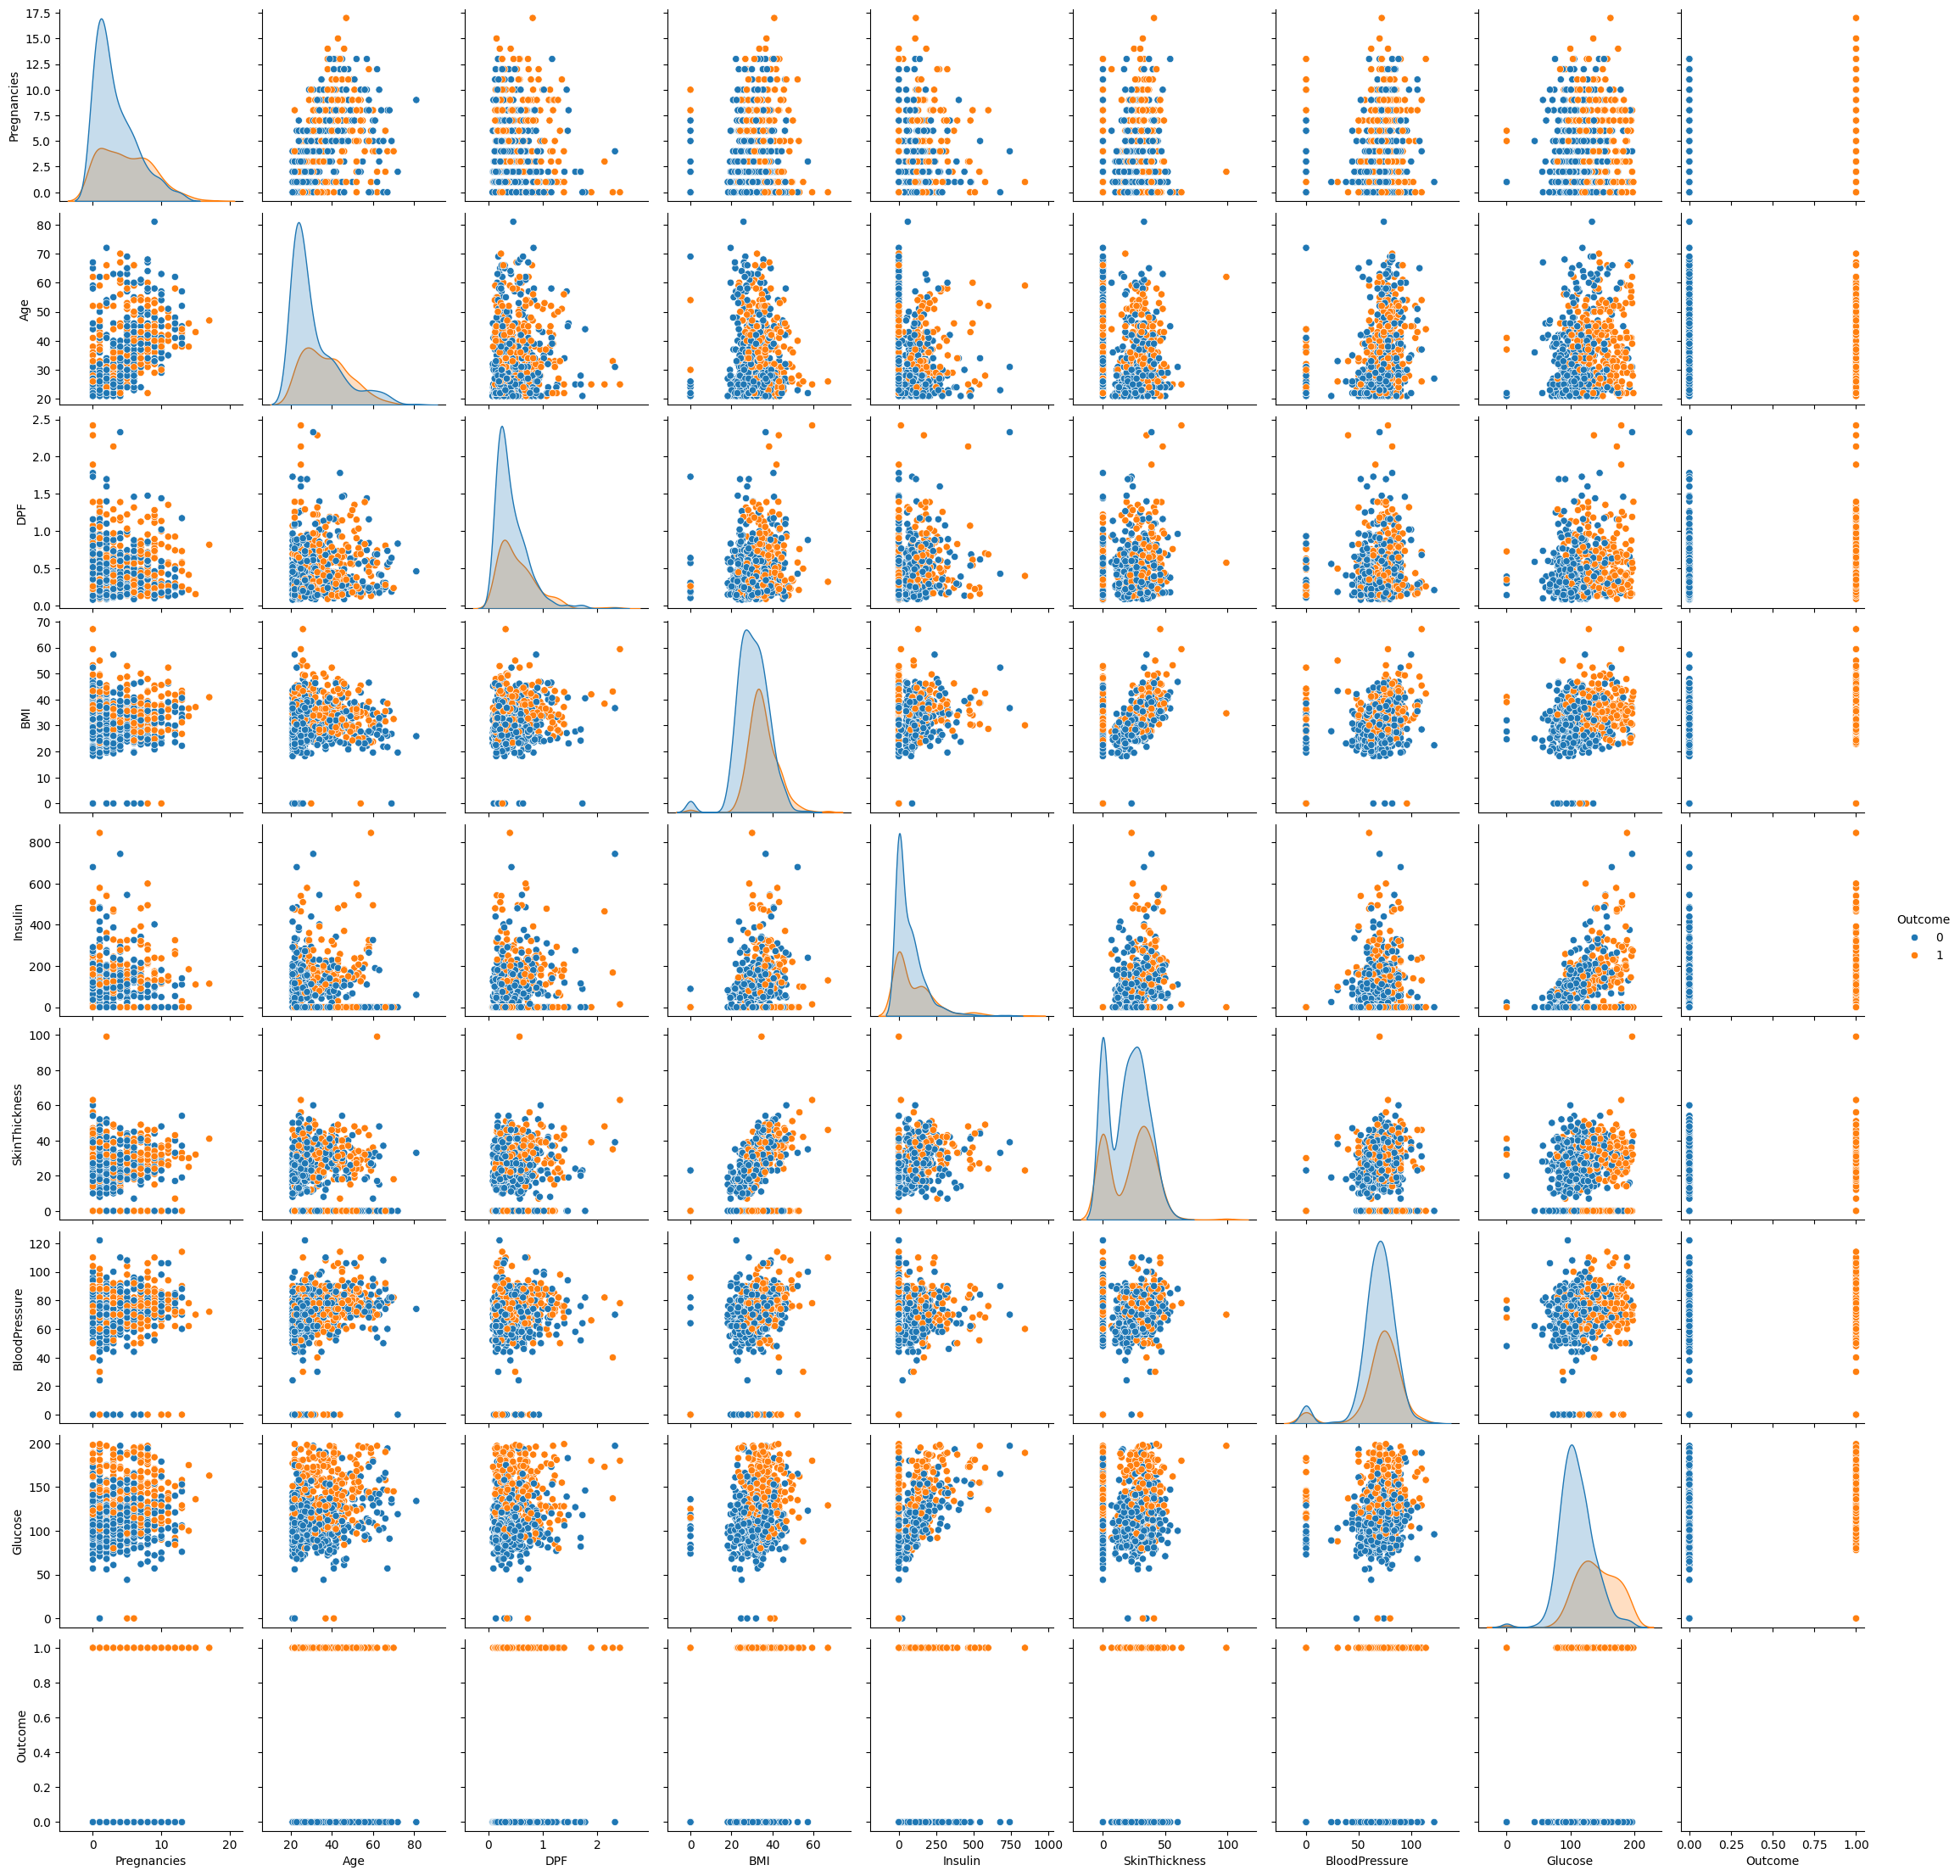

In [18]:
sns.pairplot(data = df, vars = ['Pregnancies', 'Age', 'DPF', 'BMI', 'Insulin',
            'SkinThickness', 'BloodPressure', 'Glucose', 'Outcome'], hue = 'Outcome')
plt.show()

- Bệnh nhân có nồng độ glucose cao và độ dày da cao có nguy cơ mắc bệnh tiểu đường cao hơn. Nồng độ glucose cao và chỉ số thụ tưởng của bệnh di truyền cao có nguy cơ cao mắc bệnh tiểu đường.
- Tuy nhiên, nồng độ glucose, độ dày da và hàm số thụ tưởng của bệnh di truyền một mình không dường như là một dự đoán tốt cho việc ai sẽ mắc bệnh tiểu đường. Các biểu đồ hiển thị mối quan hệ giữa các biến không cho thấy sự tương quan tích cực hoặc tiêu cực.


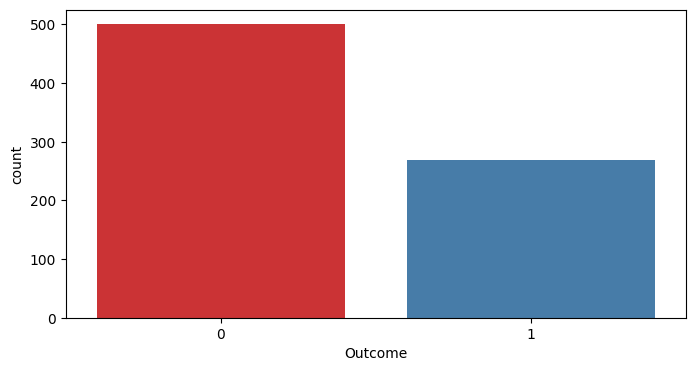

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Outcome', data=df, palette='Set1')
plt.show()

# 3. Data preprocessing.

## 3.1. Dropping duplicate values

In [15]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age, Outcome]
Index: []


## 3.2. Checking NULL values

In [16]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

## 3.1. Checking for 0 value and replacing it

In [17]:
print((df == 0).sum())

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome          500
dtype: int64


In [18]:
df[['Glucose','BloodPressure','SkinThickness',
      'Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [19]:
df.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

In [20]:
data_copy = df.copy(deep=True)

In [21]:
#only keep rows with at least 70% non-NaN values

data_copy=data_copy.dropna(thresh=0.7*len(data_copy.columns))  

In [22]:
data_copy.shape

(733, 9)

In [23]:

for i in data_copy.columns[data_copy.isnull().any(axis=0)]:     
    data_copy[i] = data_copy.groupby(["Outcome"])[i].transform(lambda x: x.fillna(x.mean()))

In [24]:
data_copy = data_copy.applymap(lambda x: round(x, 1) if isinstance(x, (int, float)) else x)

## 3.2. Balance the data

In [26]:
from imblearn.over_sampling import SMOTE

X = data_copy.drop(columns="Outcome")
y = data_copy["Outcome"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


data_copy = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Outcome')], axis=1)

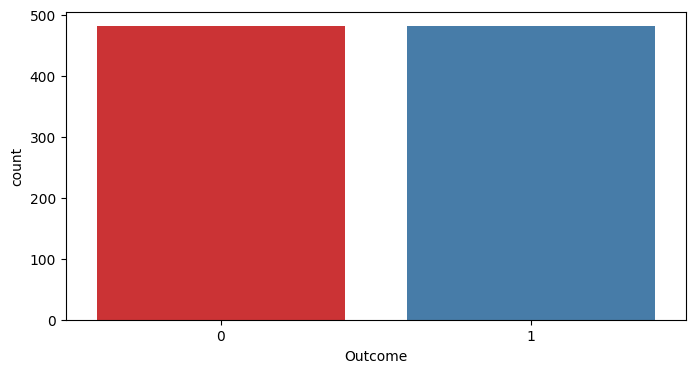

In [27]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Outcome', data=data_copy, palette='Set1')
plt.show()

## 3.3. Handling outliers

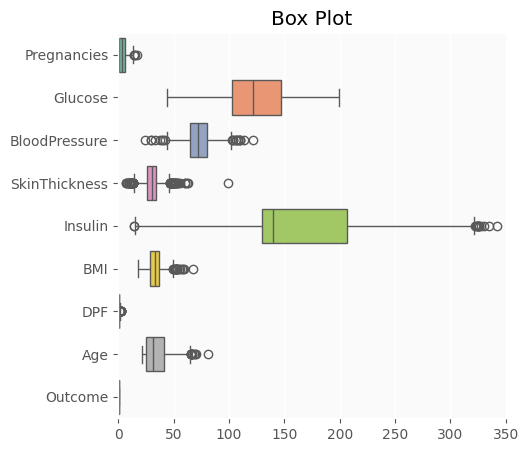

In [28]:
plt.style.use('ggplot') 

f, ax = plt.subplots(figsize=(5, 5))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 350))
plt.title("Box Plot")
ax = sns.boxplot(data = data_copy, 
  orient = 'h', 
  palette = 'Set2')

In [29]:
Q1  = pd.DataFrame()
Q3  =   pd.DataFrame()
IQR =  pd.DataFrame()
UpperLimit =  pd.DataFrame()
LowerLimit =  pd.DataFrame()
Outlier_UpperLimit =  pd.DataFrame(index=[1,2,3,4])
Outlier_LowerLimit =  pd.DataFrame(index=[1,2,3,4])

columns = data_copy.columns[0:-1]

for i in columns:
    Q1[i] = [data_copy[i].quantile(0.25)]
    Q3[i]=  [data_copy[i].quantile(0.75)]
    IQR[i] = [Q3[i][0]-Q1[i][0]]
    UpperLimit[i] = [Q3[i][0]+1.5*IQR[i][0]]
    LowerLimit[i] = [Q1[i][0]-1.5*IQR[i][0]]

In [30]:
df = pd.concat([Q1,Q3,IQR,UpperLimit,LowerLimit])
df.index = ["Q1","Q3","IQR","UpperLimit","LowerLimit"]
dft = df.T
dft

,Q1,Q3,IQR,UpperLimit,LowerLimit
Pregnancies,1.000000,6.000000,5.000000,13.500000,-6.500000
Glucose,103.000000,147.346512,44.346512,213.866280,36.480232
BloodPressure,65.000000,80.000000,15.000000,102.500000,42.500000
SkinThickness,26.000000,34.000000,8.000000,46.000000,14.000000
Insulin,130.000000,206.800000,76.800000,322.000000,14.800000
BMI,28.447846,36.800000,8.352154,49.328231,15.919615
DPF,0.300000,0.683864,0.383864,1.259661,-0.275796
Age,25.000000,41.000000,16.000000,65.000000,1.000000


In [31]:
aa =[]
print("Upper Limit Outlier: ","\n")
for i in columns:
    aa = np.array(data_copy[data_copy[i]>dft["UpperLimit"][i]][i])
        
    print("{} Outliers: {}".format(i,aa))

Upper Limit Outlier:  

Pregnancies Outliers: [15 17 14 14]
Glucose Outliers: []
BloodPressure Outliers: [110.         108.         122.         110.         104.
 108.         104.         110.         106.         106.
 106.         114.         102.88991946]
SkinThickness Outliers: [47.         47.         60.         54.         51.         56.
 50.         54.         50.         52.         48.         49.
 63.         48.         52.         49.         47.         99.
 50.         47.         48.         49.         48.         47.97668209
 52.37269041 48.12673299 62.45522665 60.07960071 52.40318961 46.68375933
 48.37301877 47.381957  ]
Insulin Outliers: [543.         846.         342.         495.         325.
 485.         495.         478.         744.         370.
 680.         402.         375.         545.         360.
 325.         465.         325.         415.         579.
 474.         328.         480.         326.         330.
 600.         440.         540.        

In [32]:
xx =[]
print("Lower Limit Outlier: ","\n")

for i in columns:
    xx = np.array(data_copy[data_copy[i]<dft["LowerLimit"][i]][i])
    
    print("{} Outliers: {}".format(i,xx))

Lower Limit Outlier:  

Pregnancies Outliers: []
Glucose Outliers: []
BloodPressure Outliers: [40.         30.         30.         24.         38.         42.23648273
 32.77420213 39.50748055]
SkinThickness Outliers: [11.         11.         10.         13.         13.         13.
 12.         13.          7.         10.         10.         11.
 12.         13.         12.          8.         13.         12.
 11.          8.         12.         12.         13.         13.
 10.          7.         11.         13.         13.         12.
 10.         11.         13.         13.00039478]
Insulin Outliers: [14.         14.27238668]
BMI Outliers: []
DPF Outliers: []
Age Outliers: []


In [33]:
columns_cap = ["Insulin","SkinThickness","DPF","Pregnancies","BloodPressure","BMI","Age"]

def Cap_Outliers(dff,column):
    for i in column:
        print('Working on column: {}'.format(i))
        dff[i] = np.where(dff[i]>dft["UpperLimit"][i],dft["UpperLimit"][i],
                            np.where(dff[i]<dft["LowerLimit"][i],dft["LowerLimit"][i],dff[i]))
    return dff

Cap_Outliers(data_copy,columns_cap)

Working on column: Insulin
Working on column: SkinThickness
Working on column: DPF
Working on column: Pregnancies
Working on column: BloodPressure
Working on column: BMI
Working on column: Age


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6.0,148.000000,72.000000,35.000000,206.8,33.600000,0.600000,50.0,1
1,1.0,85.000000,66.000000,29.000000,130.3,26.600000,0.400000,31.0,0
2,8.0,183.000000,64.000000,33.000000,206.8,23.300000,0.700000,32.0,1
3,1.0,89.000000,66.000000,23.000000,94.0,28.100000,0.200000,21.0,0
4,0.0,137.000000,42.500000,35.000000,168.0,43.100000,1.259661,33.0,1
...,...,...,...,...,...,...,...,...,...
957,9.0,102.437408,75.125184,36.125184,206.8,32.528203,0.656259,44.0,1
958,7.0,184.134646,64.680788,32.773071,206.8,24.616189,0.643268,31.0,1
959,8.0,129.723716,69.309291,33.000000,206.8,33.916809,0.672372,45.0,1
960,3.0,172.201694,82.206014,46.000000,322.0,38.193986,1.259661,25.0,1


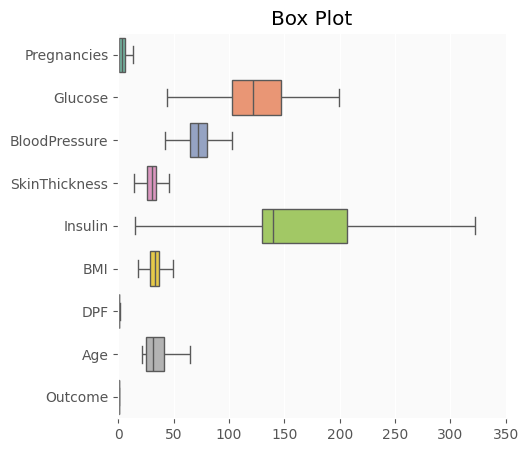

In [62]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(5, 5))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 350))
plt.title("Box Plot")
ax = sns.boxplot(data = data_copy, 
  orient = 'h', 
  palette = 'Set2')

# 4. Model

## 4.1. Model preparation

### 4.1.1. Train-Test Split

In [35]:
data_cln = pd.read_csv("data_cln.csv")
data_balenced = pd.read_csv("disbetes_balenced.csv")

In [63]:

X = data_copy.drop(columns="Outcome")
y = data_copy["Outcome"]


rs = 100     #set randome_state

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=rs, stratify=y)

In [37]:
X_train.shape

(769, 8)

### 4.1.2. Feature scaling

In [64]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_ = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

### 4.1.3. Cross-validation

In [65]:
cv = RepeatedKFold(n_splits=10 , n_repeats=5, random_state=rs)

## 4.2. KNN

In [66]:
# Creating an Objective Function

def objective_knn(trial):
    
    # Define hyperparameters
    param_knn = {'n_neighbors' : trial.suggest_int('n_neighbors', 1, 100)
    ,'weights' : trial.suggest_categorical('weights', ['uniform', 'distance']),
    'metric' : trial.suggest_categorical('metric', ['euclidean', 'manhattan','minkowski']),
    'p' : trial.suggest_int('p', 1, 50),
    'algorithm' : trial.suggest_categorical('algorithm',['auto','ball_tree', 'kd_tree', 'brute']),
    'leaf_size' : trial.suggest_int('leaf_size', 1, 100)}

    # Create and train the model
    knn = make_pipeline(StandardScaler(),KNeighborsClassifier(**param_knn))
    knn.fit(X_train, y_train)

    # Evaluate the model
    score = cross_val_score(knn, X_train, y_train, cv=cv, scoring="accuracy").mean()

    return score

In [67]:
# Creating and running our optimization

study_knn = optuna.create_study(direction='maximize',study_name = "KNN")
study_knn.optimize(objective_knn, n_trials=500)

[I 2024-05-26 13:57:08,279] A new study created in memory with name: KNN
[I 2024-05-26 13:57:09,054] Trial 0 finished with value: 0.832775119617225 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'metric': 'minkowski', 'p': 50, 'algorithm': 'auto', 'leaf_size': 53}. Best is trial 0 with value: 0.832775119617225.
[I 2024-05-26 13:57:09,853] Trial 1 finished with value: 0.8504818865345181 and parameters: {'n_neighbors': 78, 'weights': 'distance', 'metric': 'manhattan', 'p': 46, 'algorithm': 'brute', 'leaf_size': 32}. Best is trial 1 with value: 0.8504818865345181.
[I 2024-05-26 13:57:11,074] Trial 2 finished with value: 0.7810457963089543 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'metric': 'minkowski', 'p': 9, 'algorithm': 'auto', 'leaf_size': 99}. Best is trial 1 with value: 0.8504818865345181.
[I 2024-05-26 13:57:12,452] Trial 3 finished with value: 0.7789473684210526 and parameters: {'n_neighbors': 34, 'weights': 'distance', 'metric': 'minkowski', 'p': 38, 'a

In [68]:
# Evaluating our Optuna Trial
print("Best trial:", study_knn.best_trial.number)
print("Best accuracy:", study_knn.best_trial.value)
print("Best hyperparameters:", study_knn.best_params)

Best trial: 42
Best accuracy: 0.8749179767600819
Best hyperparameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'p': 7, 'algorithm': 'kd_tree', 'leaf_size': 47}


In [69]:
KNN = KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        97
           1       0.85      0.93      0.89        96

    accuracy                           0.88       193
   macro avg       0.88      0.88      0.88       193
weighted avg       0.88      0.88      0.88       193



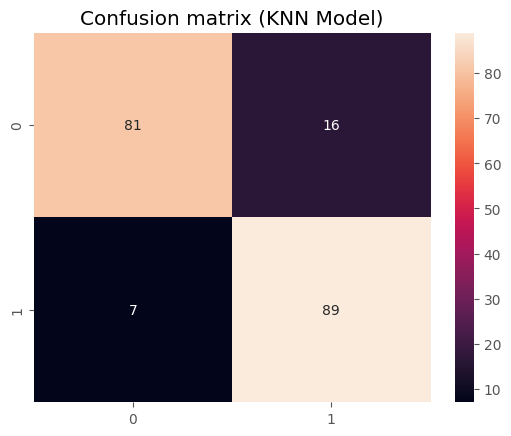

In [70]:
best_param_knn = study_knn.best_params

KNN_pipe = make_pipeline(StandardScaler(),KNeighborsClassifier(**best_param_knn)).fit(X_train,y_train)
y_pred_knn = KNN_pipe.predict(X_test)

def display_results(y_test, y_pred, cm_title):
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='d').set_title(cm_title)
    print(classification_report(y_test,y_pred))
    
display_results(y_test, y_pred_knn, cm_title = "Confusion matrix (KNN Model)")

In [45]:
data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6.0,148.0,72.0,35.0,206.8,33.6,0.600000,50.0,1
1,1.0,85.0,66.0,29.0,130.3,26.6,0.400000,31.0,0
2,8.0,183.0,64.0,33.0,206.8,23.3,0.700000,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.200000,21.0,0
4,0.0,137.0,42.5,35.0,168.0,43.1,1.259661,33.0,1


In [46]:
pre = KNN_pipe.predict([[0, 137,42.5,35,168,43.1,1.2,33]])
pre

array([1], dtype=int64)

## 4.3. Logistic regression

In [71]:

def objective_lr(trial):
    
    # Define hyperparameters
    param_logr = {'C' : trial.suggest_float("C", 0.001, 10.0, log=True),
    'solver' : trial.suggest_categorical('solver',["newton-cg", "lbfgs", "liblinear", "sag", "saga"]),
    'max_iter' : trial.suggest_int("max_iter", 1, 10000)
    }

    # Create and train the model
    lr = make_pipeline(StandardScaler(),LogisticRegression(**param_logr,random_state=rs))
    lr.fit(X_train, y_train)

    # Evaluate the model
    score = cross_val_score(lr, X_train, y_train, cv=cv, scoring="accuracy").mean()

    return score

In [72]:
# Creating and running our optimization

study_lr = optuna.create_study(direction='maximize',study_name = "logr")
study_lr.optimize(objective_lr, n_trials=500)

[I 2024-05-26 14:13:24,616] A new study created in memory with name: logr
[I 2024-05-26 14:13:25,170] Trial 0 finished with value: 0.7914285714285715 and parameters: {'C': 0.5773591269647407, 'solver': 'newton-cg', 'max_iter': 8679}. Best is trial 0 with value: 0.7914285714285715.
[I 2024-05-26 14:13:25,556] Trial 1 finished with value: 0.7916814764183187 and parameters: {'C': 0.042668879244222635, 'solver': 'lbfgs', 'max_iter': 6026}. Best is trial 1 with value: 0.7916814764183187.
[I 2024-05-26 14:13:25,924] Trial 2 finished with value: 0.7882775119617225 and parameters: {'C': 0.003252675361134568, 'solver': 'lbfgs', 'max_iter': 1799}. Best is trial 1 with value: 0.7916814764183187.
[I 2024-05-26 14:13:26,290] Trial 3 finished with value: 0.7924606971975393 and parameters: {'C': 0.13936708081631863, 'solver': 'lbfgs', 'max_iter': 9203}. Best is trial 3 with value: 0.7924606971975393.
[I 2024-05-26 14:13:26,715] Trial 4 finished with value: 0.7929835953520166 and parameters: {'C': 0.2

In [73]:
# Evaluating our Optuna Trial
print("Best trial:", study_lr.best_trial.number)
print("Best accuracy:", study_lr.best_trial.value)
print("Best hyperparameters:", study_lr.best_params)

Best trial: 56
Best accuracy: 0.7937593984962408
Best hyperparameters: {'C': 0.05506230625274933, 'solver': 'liblinear', 'max_iter': 9638}


              precision    recall  f1-score   support

           0       0.88      0.79      0.83        97
           1       0.81      0.89      0.85        96

    accuracy                           0.84       193
   macro avg       0.84      0.84      0.84       193
weighted avg       0.84      0.84      0.84       193



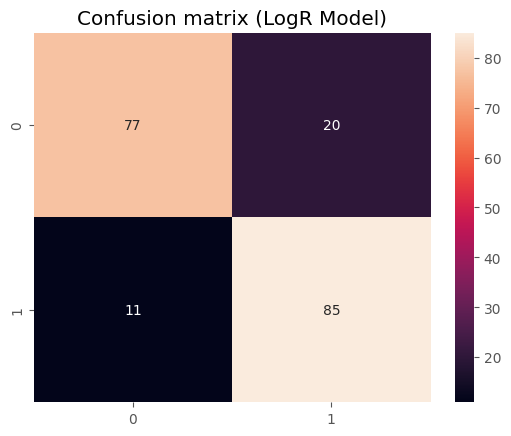

In [74]:
best_param_logr = study_lr.best_params
LR_pipe = make_pipeline(StandardScaler(),LogisticRegression(**best_param_logr)).fit(X_train,y_train)
y_pred_lr = LR_pipe.predict(X_test)
    
display_results(y_test, y_pred_lr, cm_title = "Confusion matrix (LogR Model)")

## 4.4. Decision Tree

In [51]:
# Creating an Objective Function

def objective_dect(trial):
    
    # Define hyperparameters
    param_dect = {'max_depth' : trial.suggest_int("max_depth", 2, 64),
                  'ccp_alpha' :trial.suggest_float('ccp_alpha',0.001, 10.0, log=True),
                  'max_features': trial.suggest_categorical('max_features',['auto', 'sqrt', 'log2']),
                  'min_samples_split' : trial.suggest_int("min_samples_split", 2, 30),
                  'min_samples_leaf' : trial.suggest_int("min_samples_leaf", 1, 30),
                  'criterion' : trial.suggest_categorical("criterion", ["gini", "entropy"])}

    # Create and train the model
    dect = make_pipeline(StandardScaler(),DecisionTreeClassifier(**param_dect,random_state=rs))
    dect.fit(X_train, y_train)

    # Evaluate the model
    score = cross_val_score(dect, X_train, y_train, cv=cv, scoring="accuracy").mean()

    return score

In [52]:
# Creating and running our optimization

study_dect = optuna.create_study(direction='maximize',study_name = "Dect")
study_dect.optimize(objective_dect, n_trials=500)

[I 2024-05-26 13:50:38,020] A new study created in memory with name: Dect
[I 2024-05-26 13:50:38,598] Trial 0 finished with value: 0.8353759398496241 and parameters: {'max_depth': 18, 'ccp_alpha': 0.003977421711793007, 'max_features': 'log2', 'min_samples_split': 8, 'min_samples_leaf': 28, 'criterion': 'gini'}. Best is trial 0 with value: 0.8353759398496241.
[I 2024-05-26 13:50:38,936] Trial 1 finished with value: 0.8270779220779221 and parameters: {'max_depth': 41, 'ccp_alpha': 0.14343720365702844, 'max_features': 'auto', 'min_samples_split': 3, 'min_samples_leaf': 15, 'criterion': 'gini'}. Best is trial 0 with value: 0.8353759398496241.
[I 2024-05-26 13:50:39,260] Trial 2 finished with value: 0.8270779220779221 and parameters: {'max_depth': 31, 'ccp_alpha': 0.05790539834411561, 'max_features': 'sqrt', 'min_samples_split': 8, 'min_samples_leaf': 26, 'criterion': 'gini'}. Best is trial 0 with value: 0.8353759398496241.
[I 2024-05-26 13:50:39,619] Trial 3 finished with value: 0.45226589

In [53]:
# Evaluating our Optuna Trial
print("Best trial:", study_dect.best_trial.number)
print("Best accuracy:", study_dect.best_trial.value)
print("Best hyperparameters:", study_dect.best_params)

Best trial: 140
Best accuracy: 0.8697265892002732
Best hyperparameters: {'max_depth': 53, 'ccp_alpha': 0.006275990382855098, 'max_features': 'auto', 'min_samples_split': 16, 'min_samples_leaf': 9, 'criterion': 'entropy'}


              precision    recall  f1-score   support

           0       0.95      0.82      0.88        97
           1       0.84      0.96      0.90        96

    accuracy                           0.89       193
   macro avg       0.90      0.89      0.89       193
weighted avg       0.90      0.89      0.89       193



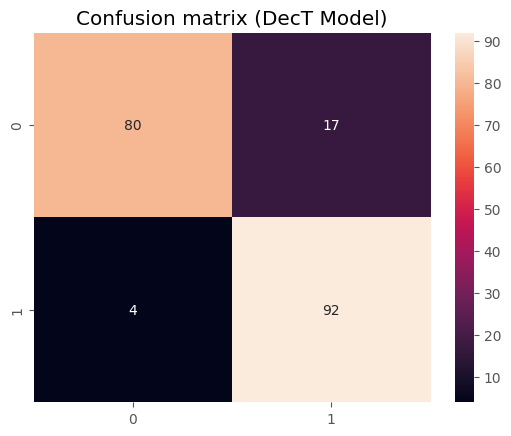

In [61]:
best_param_dect = study_dect.best_params
DecT_pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier(**best_param_dect,random_state=42)).fit(X_train,y_train)
# DecT = DecisionTreeClassifier(**best_param_dect,random_state=42).fit(X_train,y_train)

y_pred_dect = DecT_pipe.predict(X_test)
    

display_results(y_test, y_pred_dect, cm_title = "Confusion matrix (DecT Model)")

In [55]:
data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6.0,148.0,72.0,35.0,206.8,33.6,0.600000,50.0,1
1,1.0,85.0,66.0,29.0,130.3,26.6,0.400000,31.0,0
2,8.0,183.0,64.0,33.0,206.8,23.3,0.700000,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.200000,21.0,0
4,0.0,137.0,42.5,35.0,168.0,43.1,1.259661,33.0,1


In [56]:
pre = DecT_pipe.predict([[4, 100,66,23,28.1, 130,0.4,21]])
pre

array([0], dtype=int64)

## 4.5. SVM

In [57]:
# Creating an Objective Function
# TypeError: suggest_float() missing 1 required positional argument: 'high'

def objective_svm(trial):
    
    # Define hyperparameters
    
    param_grid = {
         'C': trial.suggest_float("C", 0.01, 10.0, log=True),
         'kernel': trial.suggest_categorical('kernel', ['linear' , 'poly' , 'rbf' , 'sigmoid']),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto'])
         }

    # Create and train the model
    svm = make_pipeline(StandardScaler(),SVC(**param_grid,random_state=42))
    svm.fit(X_train, y_train)

    # Evaluate the model
    score = cross_val_score(svm, X_train, y_train, cv=cv, scoring="accuracy").mean()

    return score

In [58]:
# Creating and running our optimization svm
study_svm = optuna.create_study(direction='maximize',study_name = "Svm")
study_svm.optimize(objective_svm, n_trials=500)


[I 2024-05-26 13:54:00,054] A new study created in memory with name: Svm
[I 2024-05-26 13:54:01,678] Trial 0 finished with value: 0.777617908407382 and parameters: {'C': 0.034286017205206624, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 0 with value: 0.777617908407382.
[I 2024-05-26 13:54:03,208] Trial 1 finished with value: 0.807053998632946 and parameters: {'C': 4.83875755517289, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 1 with value: 0.807053998632946.
[I 2024-05-26 13:54:04,173] Trial 2 finished with value: 0.8234278879015722 and parameters: {'C': 0.20625611624601065, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 2 with value: 0.8234278879015722.
[I 2024-05-26 13:54:05,460] Trial 3 finished with value: 0.8187559808612441 and parameters: {'C': 1.0895655686738768, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 2 with value: 0.8234278879015722.
[I 2024-05-26 13:54:06,860] Trial 4 finished with value: 0.8054853041695148 and parameters: {'C': 5.3003344803683

KeyboardInterrupt: 

In [ ]:
# Evaluating our Optuna Trial
print("Best trial:", study_svm.best_trial.number)
print("Best accuracy:", study_svm.best_trial.value)
print("Best hyperparameters:", study_svm.best_params)

Best trial: 144
Best accuracy: 0.8518079289131921
Best hyperparameters: {'C': 1.3387272951518887, 'kernel': 'rbf', 'gamma': 'scale'}


              precision    recall  f1-score   support

           0       0.91      0.87      0.89        97
           1       0.87      0.92      0.89        96

    accuracy                           0.89       193
   macro avg       0.89      0.89      0.89       193
weighted avg       0.89      0.89      0.89       193



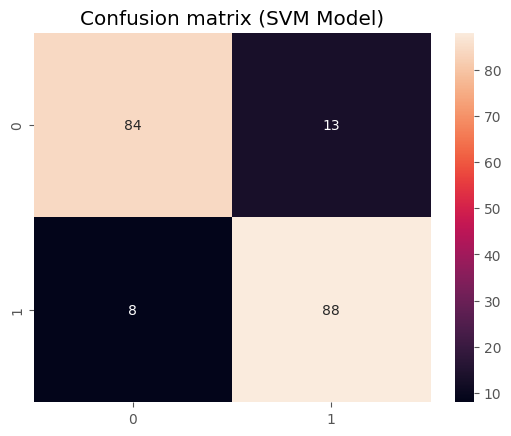

In [ ]:
best_param_svm = study_svm.best_params

Svm_pipe = make_pipeline(StandardScaler(),SVC(**best_param_svm,random_state=42)).fit(X_train,y_train)
# Svm = SVC(**best_param_svm,random_state=42).fit(X_train,y_train)

y_pred_dect = Svm_pipe.predict(X_test)
    

display_results(y_test, y_pred_dect, cm_title = "Confusion matrix (SVM Model)")

## 4.6 RandomForest

In [ ]:
# Creating an Objective Function
# TypeError: suggest_float() missing 1 required positional argument: 'high'

def objective_rdf(trial):
    
    # Define hyperparameters
    
    param_grid = {
          'n_estimators': trial.suggest_int("n_estimators", 30, 300, log=True),
          'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
          'max_depth': trial.suggest_int("max_depth", 1, 100),
          'min_samples_split': trial.suggest_int("min_samples_split", 2, 30),
          'min_samples_leaf': trial.suggest_int("min_samples_leaf", 1, 30),
          'max_features': trial.suggest_categorical('max_features',['auto', 'sqrt', 'log2']),
          'bootstrap': trial.suggest_categorical('bootstrap',[True, False])
         }

    # Create and train the model
    rdf = make_pipeline(StandardScaler(),RandomForestClassifier(**param_grid,random_state=42))
    rdf.fit(X_train, y_train)

    # Evaluate the model
    score = cross_val_score(rdf, X_train, y_train, cv=cv, scoring="accuracy").mean()

    return score

In [ ]:
# Creating and running our optimization svm
study_rdf = optuna.create_study(direction='maximize',study_name = "Rdf")
study_rdf.optimize(objective_rdf, n_trials=500)


[I 2024-05-24 11:35:40,812] A new study created in memory with name: Rdf
[I 2024-05-24 11:35:45,040] Trial 0 finished with value: 0.8819343814080653 and parameters: {'n_estimators': 38, 'criterion': 'gini', 'max_depth': 37, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.8819343814080653.
[I 2024-05-24 11:35:53,326] Trial 1 finished with value: 0.8775187969924813 and parameters: {'n_estimators': 91, 'criterion': 'gini', 'max_depth': 90, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8819343814080653.
[I 2024-05-24 11:36:08,031] Trial 2 finished with value: 0.8938961038961039 and parameters: {'n_estimators': 143, 'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 2 with value: 0.8938961038961039.
[I 2024-05-24 11:36:13,511] Trial 3 finished with val

In [ ]:
# Evaluating our Optuna Trial
print("Best trial:", study_rdf.best_trial.number)
print("Best accuracy:", study_rdf.best_trial.value)
print("Best hyperparameters:", study_rdf.best_params)

Best trial: 278
Best accuracy: 0.9068831168831168
Best hyperparameters: {'n_estimators': 233, 'criterion': 'entropy', 'max_depth': 98, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}


              precision    recall  f1-score   support

           0       0.98      0.89      0.93        97
           1       0.90      0.98      0.94        96

    accuracy                           0.93       193
   macro avg       0.94      0.93      0.93       193
weighted avg       0.94      0.93      0.93       193



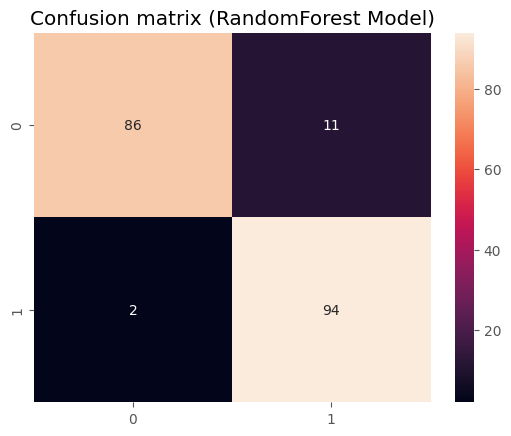

In [ ]:
best_param_rdf = study_rdf.best_params

rdf_pipe = make_pipeline(StandardScaler(),RandomForestClassifier(**best_param_rdf,random_state=42)).fit(X_train,y_train)
# Svm = SVC(**best_param_svm,random_state=42).fit(X_train,y_train)

y_pred_dect = rdf_pipe.predict(X_test)
    

display_results(y_test, y_pred_dect, cm_title = "Confusion matrix (RandomForest Model)")

In [ ]:
pre = rdf_pipe.predict([[4, 100,66,23,28.1, 130,0.4,21]])
pre

array([0], dtype=int64)

# 5. Save model

In [ ]:
from skl2onnx import to_onnx
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

# Tạo mô hình ONNX

initial_type = [('input', FloatTensorType([None, 8]))]
onnx_model = convert_sklearn(rdf_pipe, initial_types=initial_type)

# Lưu mô hình ONNX vào tệp
with open("rdr_diabetes.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import onnxruntime as rt

# Prepare the input data
# Replace this with your actual test data
test_data = np.array([[1, 85, 66, 29, 0, 26.6, 0.351, 31]])

# Create an inference session
sess = rt.InferenceSession("dect_diabetes.onnx", providers=["CPUExecutionProvider"])

# Get the input name and output name
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name

test_data = test_data.astype(np.float32)
# Run the model and get the prediction
pred_onx = sess.run([label_name], {input_name: test_data})[0]

print(pred_onx[0])


0
